In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
Data = pd.read_csv('../input/fetal-health-classification/fetal_health.csv')
Data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
Data.isnull().sum()
# No missing values 

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

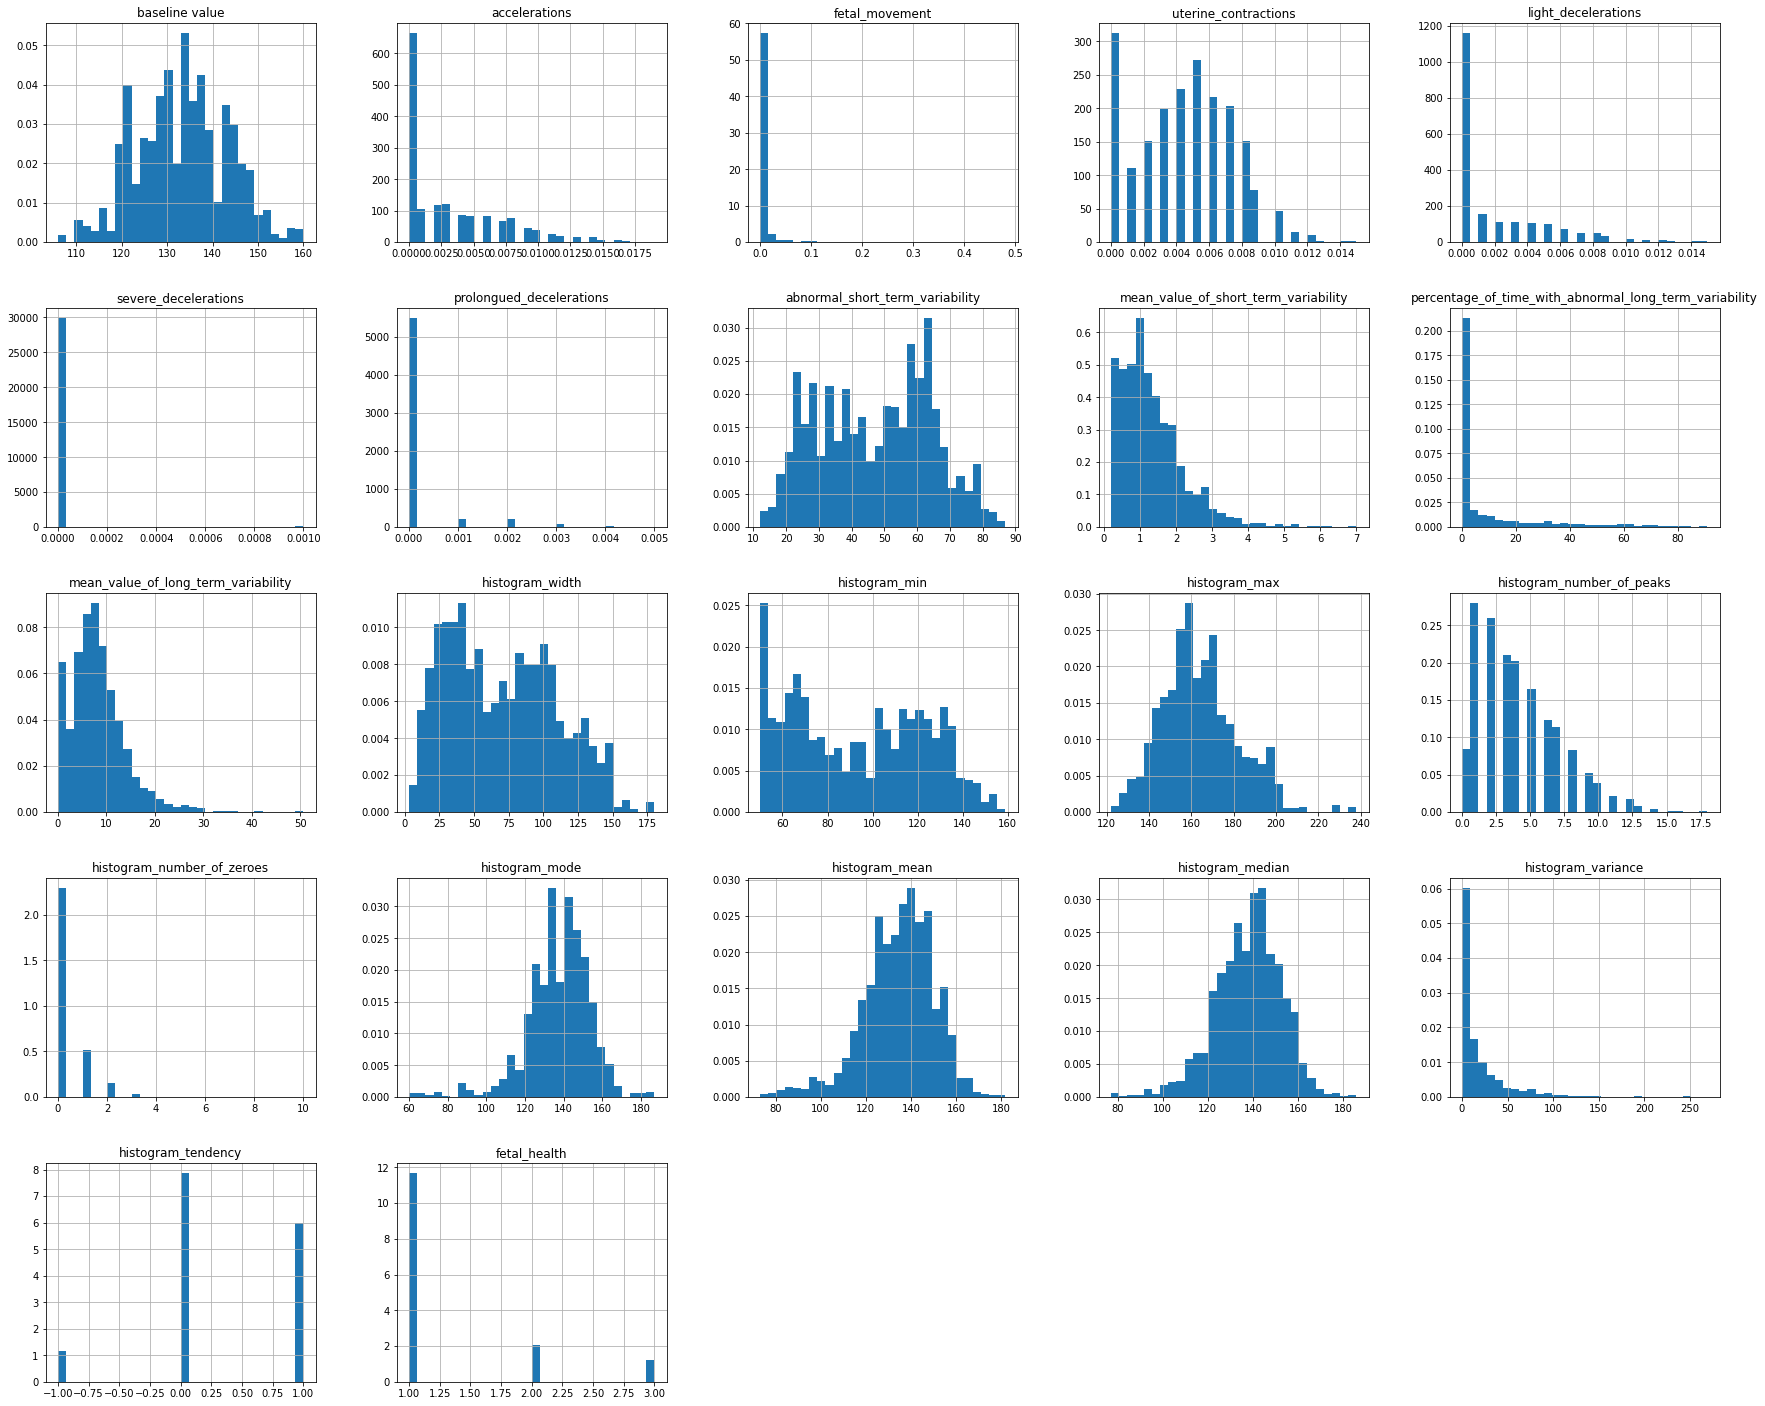

In [5]:
Data.hist( bins=30, figsize=(30,25) , density=True )
plt.show()

Catagorical Features: <br>
   1) severe_decelerations <br>
   2) prolongued_decelerations <br>
   3) histogram_number_of_zeros <br>
   4) histogram_tendency






In [6]:
all_features = Data.columns.to_list()

In [7]:
cat_features=['histogram_number_of_peaks','severe_decelerations','prolongued_decelerations','histogram_number_of_zeros','histogram_tendency']
num_features= list( set(all_features)-set(cat_features)-set(['fetal_health']))
num_features

['histogram_mode',
 'histogram_min',
 'histogram_median',
 'histogram_number_of_zeroes',
 'histogram_width',
 'light_decelerations',
 'abnormal_short_term_variability',
 'histogram_max',
 'fetal_movement',
 'uterine_contractions',
 'baseline value',
 'mean_value_of_short_term_variability',
 'mean_value_of_long_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'histogram_mean',
 'histogram_variance',
 'accelerations']

In [8]:
Data[ Data['histogram_number_of_zeroes']<=0 ]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.0,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.0,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,140.0,0.000,0.0,0.005,0.001,0.0,0.0,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1.0
2121,140.0,0.000,0.0,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.0,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.0,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0


In [9]:
X = Data.drop( 'fetal_health', axis=1 )
y = Data['fetal_health']
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.25, random_state=42)

In [10]:
from scipy.stats import boxcox

for column in ['histogram_mean','baseline value','histogram_max','histogram_min', 'histogram_median', 'histogram_mode','histogram_width']:
  X_train[column], fitted_lambda = boxcox( X_train[column] )
  X_test[column] = boxcox( X_test[column], fitted_lambda )

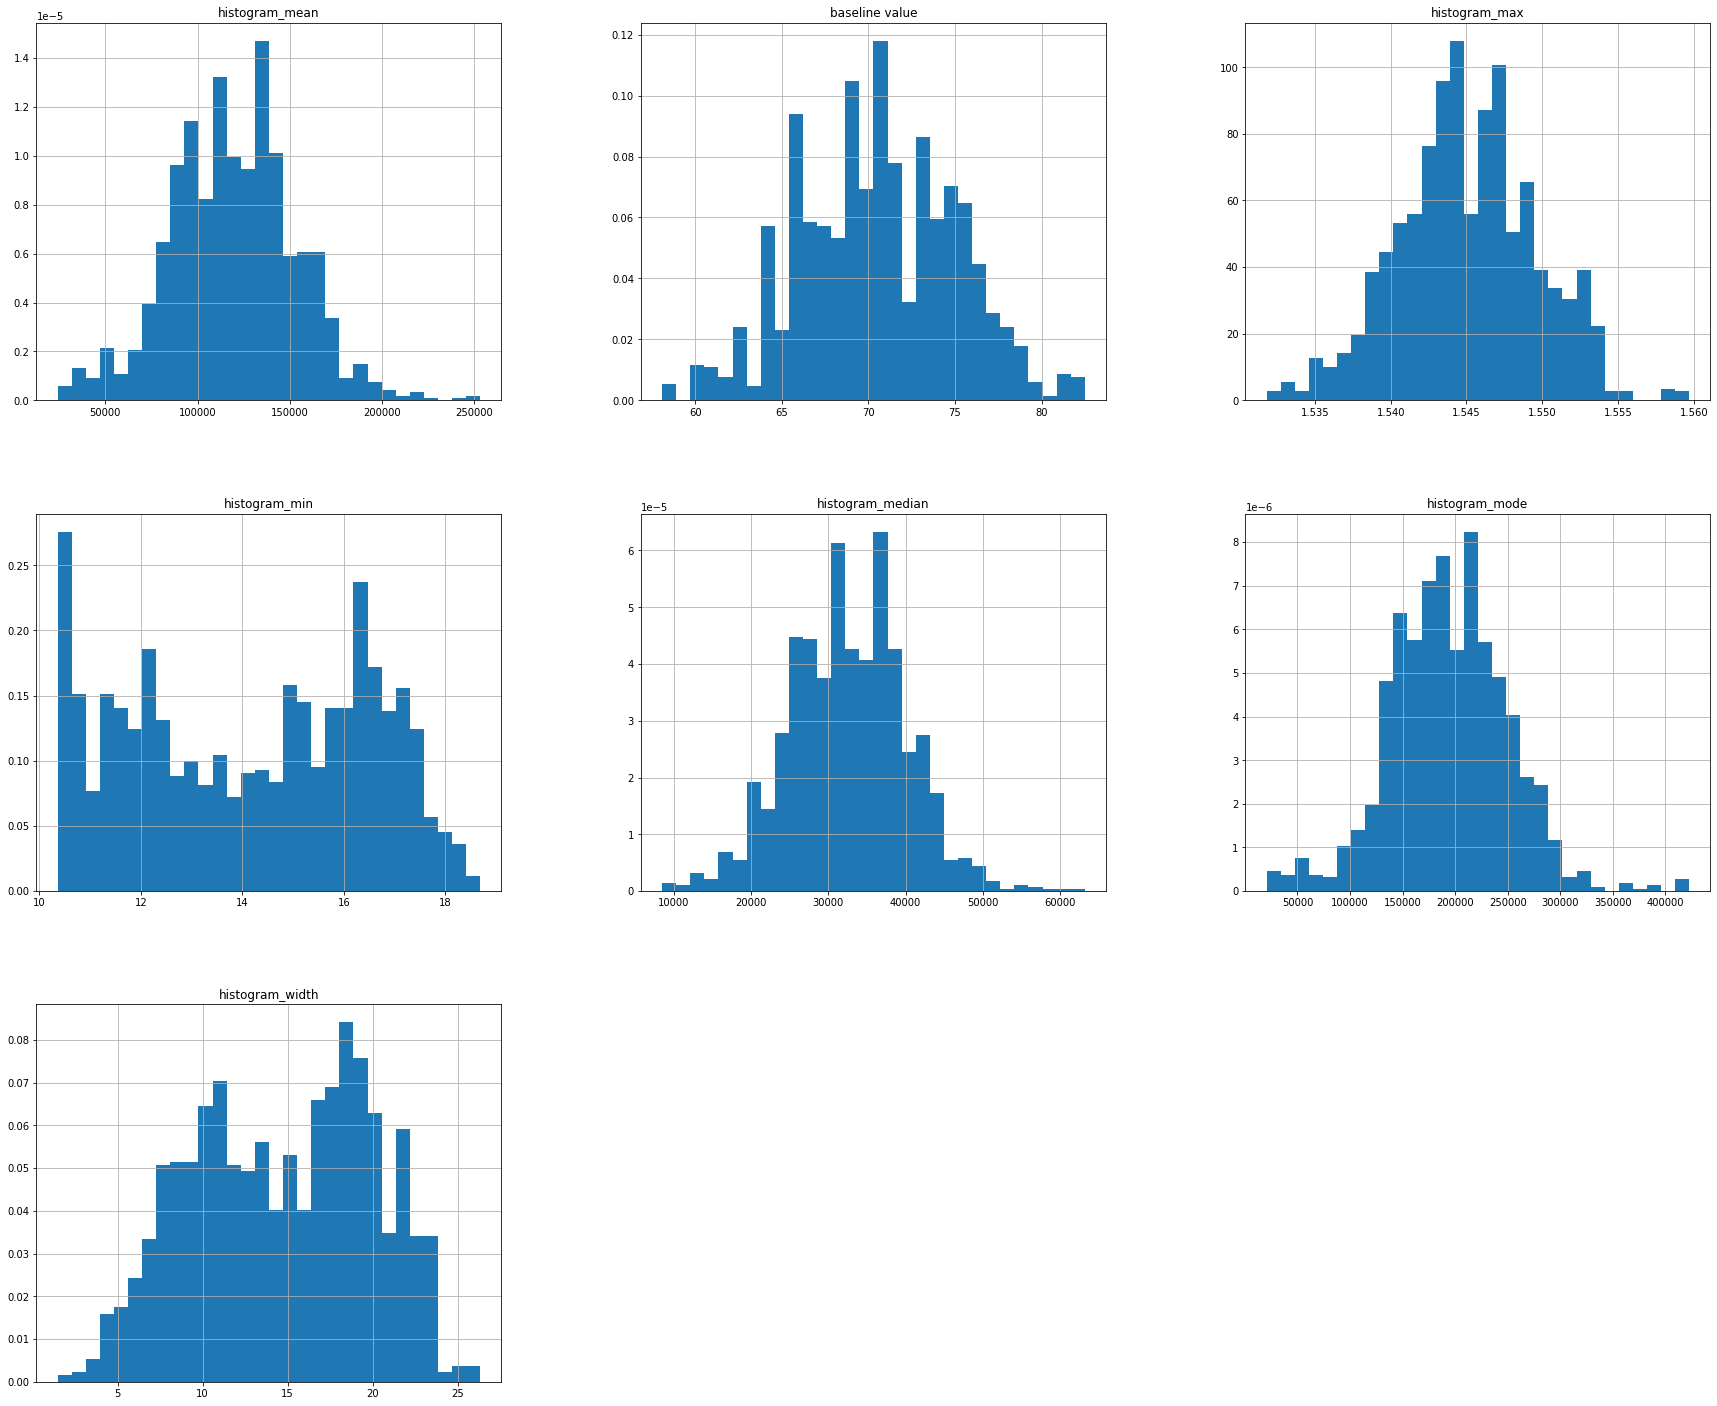

In [11]:
X_train[['histogram_mean','baseline value','histogram_max','histogram_min', 'histogram_median', 'histogram_mode','histogram_width']].hist( bins=30, figsize=(30,25) , density=True )
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_temp = num_features #list( set(num_features) - set(['histogram_mean','baseline value','histogram_max','histogram_min', 'histogram_median', 'histogram_mode','histogram_width']) )
scaler.fit(Data[features_temp])

StandardScaler()

In [13]:
X_train[features_temp] = scaler.transform(X_train[features_temp])
X_test[features_temp] = scaler.transform( X_test[features_temp] )

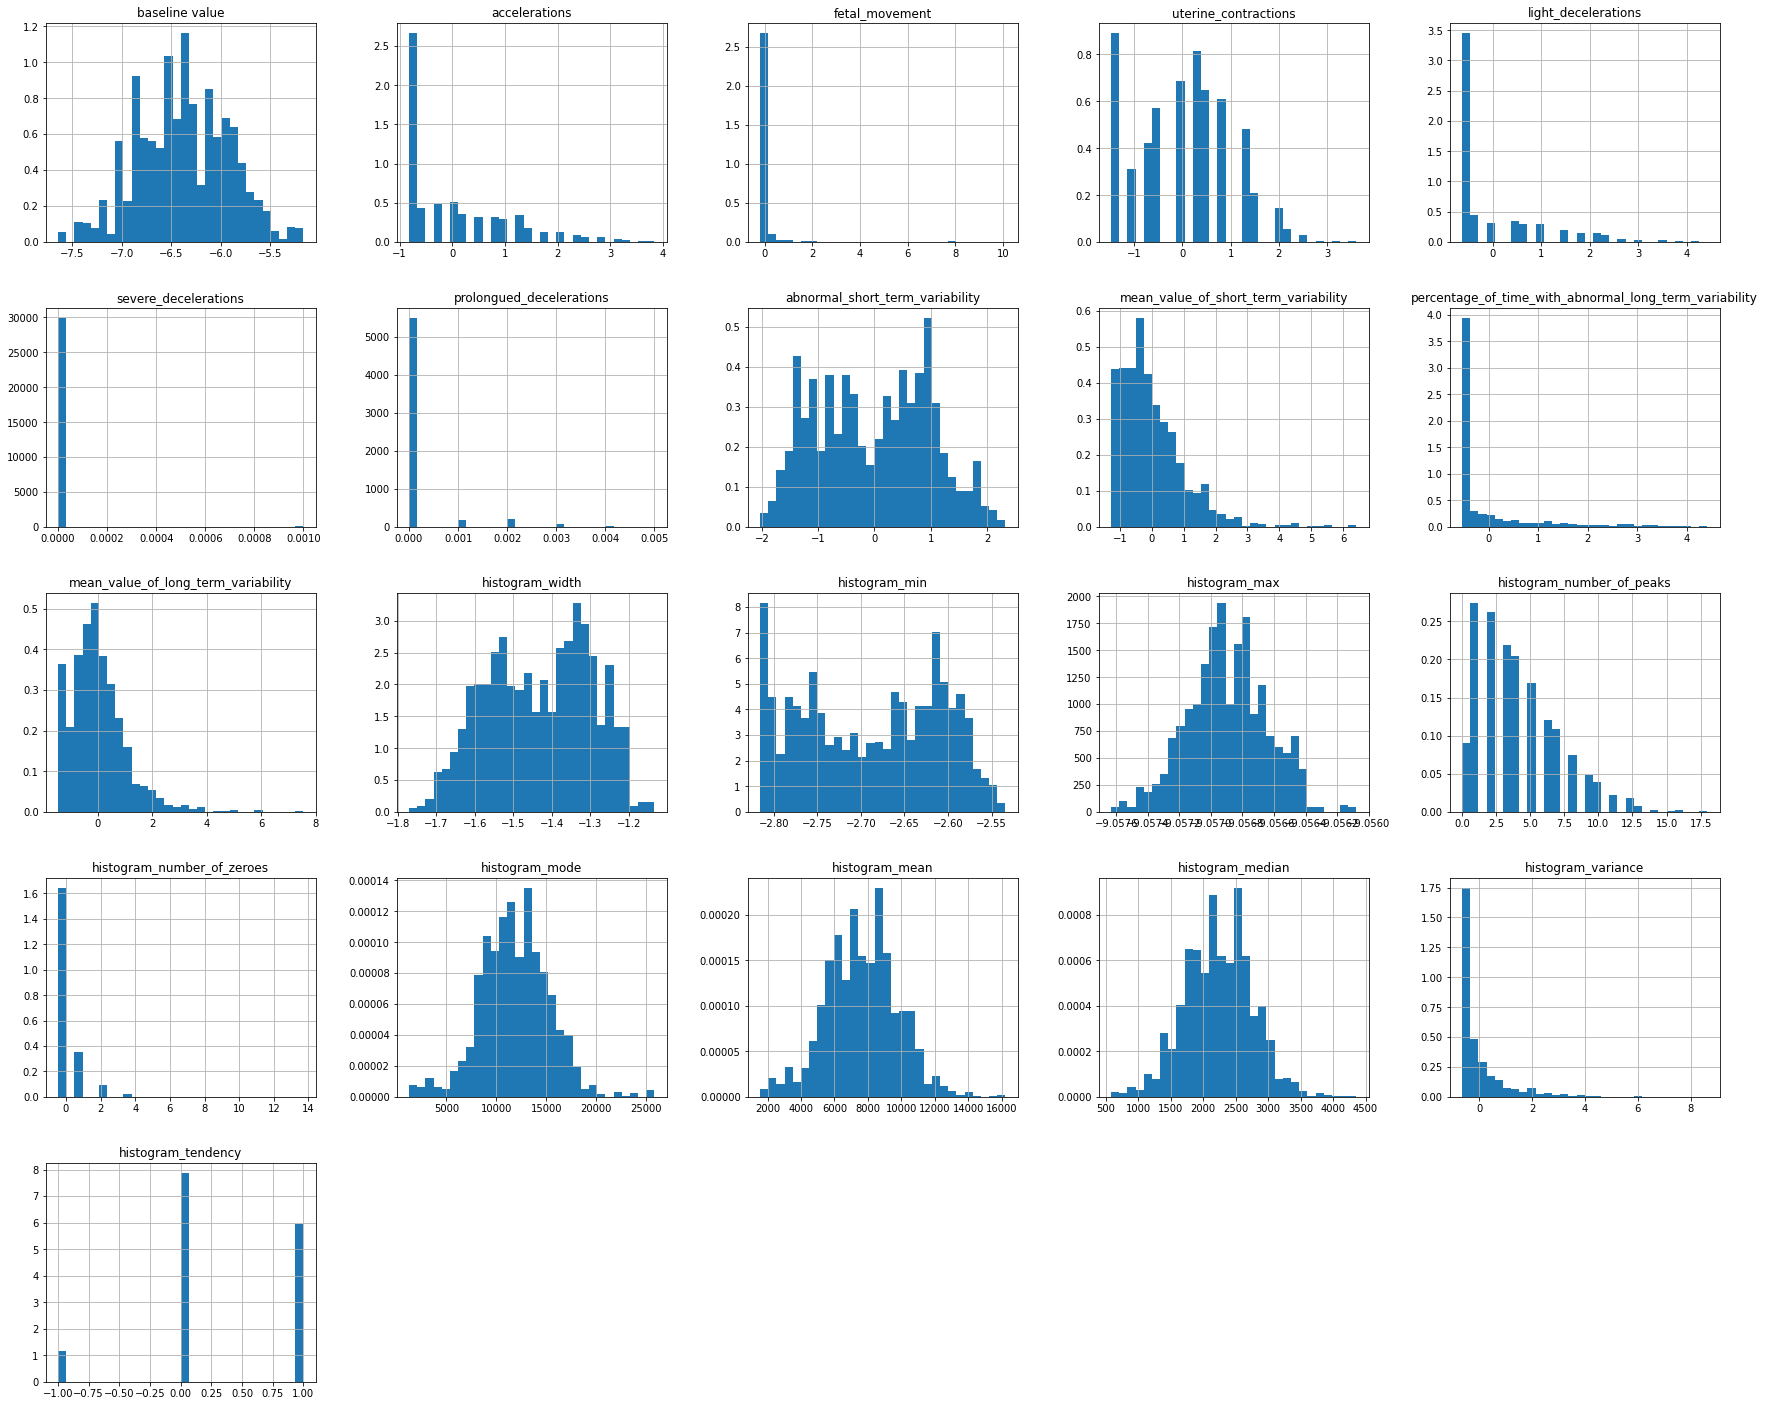

In [14]:
X_train.hist( bins=30, figsize=(30,25) , density=True )
plt.show()

***

## Applying Classification Models and Hypertuning using Grid Search


In [15]:
# n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int) # Number of trees in random forest

# max_features = ['auto', 'sqrt'] # Number of features to consider at every split

# max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200] # Maximum number of levels in tree

# min_samples_split = [1, 2, 5, 10, 15, 20, 30] # Minimum number of samples required to split a node # min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]

# min_samples_leaf = [0.25, 0.5, 1, 2, 3, 4] # Minimum number of samples required at each leaf node

# bootstrap = [True, False] # Method of selecting samples for training each tree

# criterion=['gini', 'entropy'] # Criterion
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap,
#                'criterion': criterion}

# rf_base = RandomForestClassifier()

# rf_grid_cv = GridSearchCV(rf_base, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# rf_grid_cv.fit(X_train, y_train )

# rf_grid_cv.best_params_

In [16]:
rfc = RandomForestClassifier(bootstrap = False, criterion= 'entropy', max_depth = 20, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 5, n_estimators = 2792)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred,average='micro')}")

Accuracy of the classifier is: 0.9530075187969925
Recall Score of the classifier is: 0.9530075187969925


In [17]:
# xgb_clf = XGBClassifier()

# param_grid = {
#     "max_depth": [3, 4, 5, 7],
#     "learning_rate": [0.1, 0.01, 0.05],
#     "gamma": [0, 0.25, 1],
#     "reg_lambda": [0, 1, 10],
#     "scale_pos_weight": [1, 3, 5],
#     "subsample": [0.8],
#     "colsample_bytree": [0.5],
# }

# # Init Grid Search
# grid_cv = GridSearchCV(xgb_clf, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# # Fit
# grid_cv.fit(X_train, y_train)

# grid_cv.best_params_

In [18]:
xgb_clf = XGBClassifier( colsample_bytree= 0.5, gamma = 0, learning_rate = 0.1, max_depth =3, reg_lambda=0, scale_pos_weight= 1, subsample=0.8 )
xgb_clf.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = xgb_clf.predict(X_test)

# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred,average='micro')}")

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1. 2. 3.]